# Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_res = pd.merge(mouse_metadata, study_results, on="Mouse ID" )

# Display the data table for preview
mouse_res.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Unique_Mice = mouse_res['Mouse ID'].unique()
Total_Unique_Mice = len(mouse_res['Mouse ID'].unique())

print(f"Total Number of Unique Mice is: {Total_Unique_Mice}")

Total Number of Unique Mice is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_res['Duplicated'] = mouse_res.duplicated(subset=['Mouse ID','Timepoint'])

dup_mice = mouse_res[mouse_res['Duplicated']==True] 
dup_mice[['Mouse ID','Timepoint']]


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = mouse_res[mouse_res['Mouse ID'].isin(dup_mice)==False]

#reset / cleaned data
cleaned_data.reset_index(drop= True, inplace=True) 

cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_total = len(cleaned_data['Mouse ID'].unique())

print(f"Total Number of Cleaned Mice is: {cleaned_total}")

Total Number of Cleaned Mice is: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Stats_df = cleaned_data.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', 'mean'), Median=('Tumor Volume (mm3)', 'median'),
                                               Var=('Tumor Volume (mm3)', 'var'), Std_Dev=('Tumor Volume (mm3)', 'std'), 
                                               SEM=('Tumor Volume (mm3)', 'sem'))

Summary_Stats_df

,Mean,Median,Var,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Summary_Stats_df = cleaned_data.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', 'mean'), Median=('Tumor Volume (mm3)', 'median'),
                                               Var=('Tumor Volume (mm3)', 'var'), Std_Dev=('Tumor Volume (mm3)', 'std'), 
                                               SEM=('Tumor Volume (mm3)', 'sem'))
Summary_Stats_df

,Mean,Median,Var,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of treatment'}, xlabel='Drug Regimen', ylabel='Total Count'>

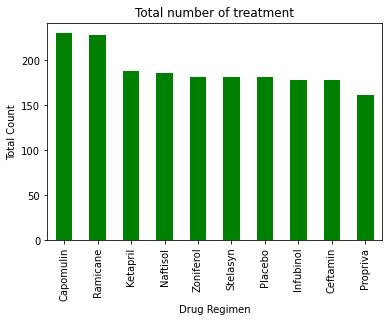

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

barplot = cleaned_data.groupby(["Drug Regimen"])["Mouse ID"].count()
barplot = barplot.sort_values(ascending=False)

barplot.plot(kind='bar', title='Total number of treatment', 
                     color='green',width=0.5, ylabel="Total Count",legend=False )

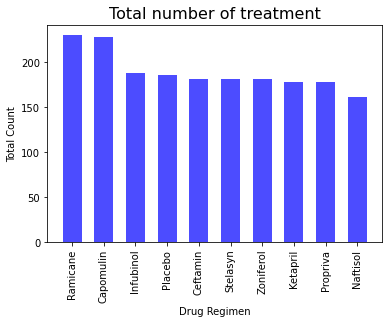

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = cleaned_data["Drug Regimen"].unique()
plt.bar(x_axis, barplot, color='blue', width=0.6, alpha=0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.xticks(rotation='vertical')
plt.title("Total number of treatment", fontsize=16)
plt.savefig("Treatment.png")
plt.show()

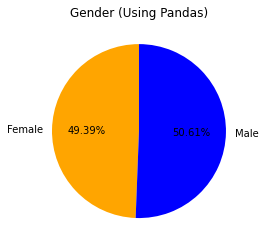

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieplot = cleaned_data.groupby(['Sex'])['Mouse ID'].count()
pieplot.plot(kind='pie',colors=['orange','blue'], startangle=90, autopct = "%.2f%%", ylabel='', title='Gender (Using Pandas)')
plt.savefig("Gender.png")

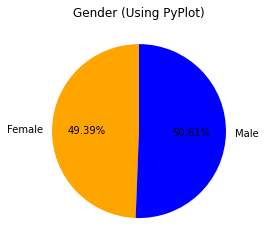

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pieplot2 = cleaned_data.groupby(['Sex'])['Mouse ID'].count()
labels = ['Female', 'Male']
colors = ['orange','blue']
plt.title('Gender (Using PyPlot)')

plt.pie(pieplot2, labels=labels, colors=colors,
        autopct="%.2f%%", shadow=False, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_tum_vol = pd.DataFrame(cleaned_data.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint': 'Last Timepoint'})

# Start by getting the last (greatest) timepoint for each mouse
last_tum_vol.reset_index(inplace=True)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_res = pd.merge(cleaned_data, last_tum_vol, on='Mouse ID')

merged_res


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,45
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
# Create empty list to fill with tumor vol data (for plotting)
treatment_list = []

i = 0 

for drug in drugs:
    temp_res = merged_res.loc[merged_res['Drug Regimen'] == drug]
    final_res = temp_res.loc[temp_res['Timepoint'] == temp_res['Last Timepoint']]
    values = final_res['Tumor Volume (mm3)']
    treatment_list.append(values)
    quartiles = values.quantile([.25,.5,.75])
    
    # Upper, Lower, IQR, Median
    LowerQ = quartiles[0.25]
    print(f'The Lower Quartile for {drug} is {LowerQ}')
    
    UpperQ = quartiles[0.75]
    print(f'The Upper Quartile for {drug} is {UpperQ}')
     
    iqr = UpperQ-LowerQ
    print(f'The Inter Quartile Range for {drug} is: {iqr}')
    
    print(f'The Median result for {drug} is: {quartiles[0.5]}')
    
    #     Potential Outliers for each Drug
    out_lower = LowerQ - (1.5*iqr)
    out_upper = UpperQ + (1.5*iqr)
    print(f'The potential Outliers is {out_lower} for {drug}.')
    print(f'The potential Outliers is {out_upper} for {drug}.')
   
    print(f'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    

outliers = merged_res.loc[(merged_res['Tumor Volume (mm3)'] < out_lower) | (merged_res['Tumor Volume (mm3)'] > out_upper)]
print(f'\n')
print(f'DataFrame of Potential Outliers Mice')
outliers

The Lower Quartile for Capomulin is 32.37735684
The Upper Quartile for Capomulin is 40.1592203
The Inter Quartile Range for Capomulin is: 7.781863460000004
The Median result for Capomulin is: 38.125164399999996
The potential Outliers is 20.70456164999999 for Capomulin.
The potential Outliers is 51.83201549 for Capomulin.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The Lower Quartile for Ramicane is 31.56046955
The Upper Quartile for Ramicane is 40.65900627
The Inter Quartile Range for Ramicane is: 9.098536719999998
The Median result for Ramicane is: 36.56165229
The potential Outliers is 17.912664470000003 for Ramicane.
The potential Outliers is 54.30681135 for Ramicane.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The Lower Quartile for Infubinol is 54.04860769
The Upper Quartile for Infubinol is 65.52574285
The Inter Quartile Range for Infubinol is: 11.477135160000003
The Median result for Infubinol is: 60.16518046
The potential Out

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated,Last Timepoint
8,k403,Ramicane,Male,21,16,40,24.365505,1,False,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,False,45
18,s185,Capomulin,Female,3,17,40,25.472143,1,False,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,False,45


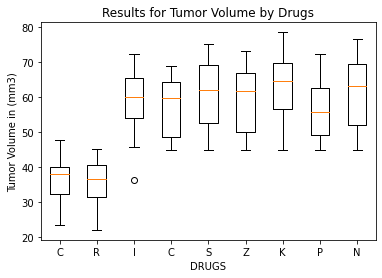

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(treatment_list)
plt.title('Results for Tumor Volume by Drugs')
plt.ylabel('Tumor Volume in (mm3)')
plt.xlabel ('DRUGS')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['C', 'R', 'I', 'C','S', 'Z', 'K', 'P', 'N'])
plt.savefig("out_drugs.png")
plt.show()

## Line and Scatter Plots

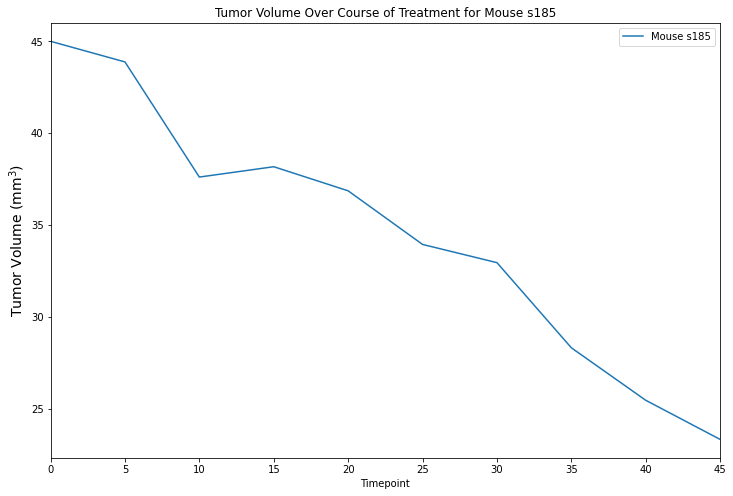

In [19]:
capomulin_mouse = cleaned_data[cleaned_data["Mouse ID"] == "s185"]
plot = capomulin_mouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)", figsize=(12,8), label="Mouse s185")
plot.set_ylabel("Tumor Volume (mm$^{3}$)", fontsize=14)
plot.set_xlabel("Timepoint")
plot.set_title("Tumor Volume Over Course of Treatment for Mouse s185")
plt.xticks
plt.yticks
plt.legend
plt.ylim(capomulin_mouse['Tumor Volume (mm3)'].min()-1, capomulin_mouse['Tumor Volume (mm3)'].max()+1)
plt.xlim(capomulin_mouse['Timepoint'].min(), capomulin_mouse['Timepoint'].max())
plt.savefig("Line - s185.png")
plt.show()

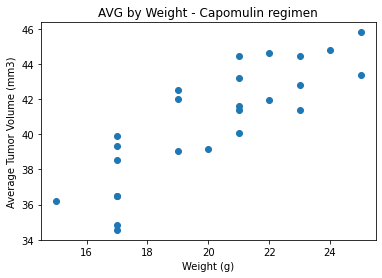

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
avg_tum_vol = pd.DataFrame(capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()).reset_index()
weight = pd.DataFrame(capomulin_data.groupby(["Mouse ID"])["Weight (g)"].max()).reset_index()
# Merge
plot_data = pd.merge(avg_tum_vol, weight, on="Mouse ID")
# Plot with Weight and Mean Volume
x_axis = weight['Weight (g)']
y_axis = avg_tum_vol['Tumor Volume (mm3)']

# Create the scatter plot 
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('AVG by Weight - Capomulin regimen')
plt.savefig("Scatter Plot.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


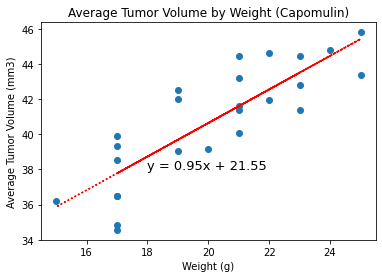

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
print(f'The correlation between both factors is {round(correlation[0],2)}')

mt_slope, mt_int, mt_r, mt_p, mt_std_err = st.linregress(x_axis, y_axis)
mt_fit = mt_slope * x_axis + mt_int
line_equation = f'y = {str(round(mt_slope,2))}x + {str(round(mt_int,2))}'


plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight (Capomulin)')
plt.annotate(line_equation,(18,38),fontsize=13,color='black')
plt.plot(x_axis,mt_fit,':r')
plt.savefig("Linear Regression Model.png")